In [0]:
import matplotlib.pyplot as plt

In [0]:
def compute_f_of_x(x):
  psi_probabilities = {1:1/4, 4:3/8, 8:3/8}
  f = 0
  for psi in psi_probabilities.keys():
    if x <= psi:
      f += 2 * (psi-x) * psi_probabilities[psi]
    elif x >= psi:
      f += 3 * (x-psi) * psi_probabilities[psi]
  return f


In [0]:
def compute_subgradient(x, x_t):
  f_x = compute_f_of_x(x)
  f_x_t = compute_f_of_x(x_t)
  s_t = (f_x - f_x_t) / (x - x_t)
  return s_t

In [0]:
def compute_level_t(t, m_t_x, lamb, f_x_t):
  LB = m_t_x[t]
  UB = min(f_x_t)
  print('LB ' + str(LB))
  print('UB ' + str(UB))
  level = LB + lamb*(UB-LB)
  return level

In [0]:
def compute_x_t(t, x_t, f_x_t, s_t, level_t):
  # x_int = (y_1 - y_0) / slope + x_0
  x = (level_t[t] -f_x_t[t]) / s_t[t] + x_t[t]
  return x

In [0]:
def compute_m_t_of_x(t, x_t, f_x_t, s_t):
  #https://www.mathopenref.com/coordintersection.html
  #Given two lines in slope-point form, set them equal to eachother
  #y = m ( x − Px ) + Py  
  #Where:
    #x, y	are the coordinates of any point on the line
    #m	is the slope of the line
    #Px , Py	are x and y coordinates of the given point P that defines the line
  #Find x_(t+1)
  #print(str(s_t[t-1]) + '  '+str(x_t[t-1]) + '  ' + str(f_x_t[t-1]))
  #print(str(s_t[t]) + '  '+str(x_t[t]) + '  ' + str(f_x_t[t]))
  x_t_plus1 = (-1*s_t[t-1] * x_t[t-1] + f_x_t[t-1] + s_t[t]*x_t[t] - f_x_t[t]) / (s_t[t] - s_t[t-1])
  m_t_plus1_x = s_t[t]*(x_t_plus1 - x_t[t]) + f_x_t[t]
  return m_t_plus1_x

In [0]:
def plotSubgradients(t,x_t,f_x_t,s_t):
  plt.grid(True)
  plt.xlim(0,10)
  plt.ylim(0,10)
  for i in range(0,t+1):
    plt.plot([x_t[i]],[f_x_t[i]], 'bx', lw=2)
    plt.text(x_t[i],0, 'x'+str(i), fontsize=9)
    plt.text(x_t[i],f_x_t[i], 'f(x'+str(i)+')', fontsize=9)
    
    x_int = (0 - f_x_t[i]) / s_t[i] + x_t[i]   # x_int = (y_1 - y_0) / slope + x_0
    #print(x_int)
    plt.plot([x_t[i], x_int], [f_x_t[i], 0], 'k-', lw=2)   #[x1, x2], [y1,y2]

In [0]:
def plotLevel(t,x_t,f_x_t,s_t,level_t):
  plt.grid(True)
  plt.xlim(0,10)
  plt.ylim(0,10)
  for i in range(0,t+1):
    plt.plot([x_t[i]],[f_x_t[i]], 'bx', lw=2)
    plt.text(x_t[i],0, 'x'+str(i), fontsize=9)
    plt.text(x_t[i],f_x_t[i], 'f(x'+str(i)+')', fontsize=9)
    
    x_int = (0 - f_x_t[i]) / s_t[i] + x_t[i]   # x_int = (y_1 - y_0) / slope + x_0
    plt.plot([x_t[i], x_int], [f_x_t[i], 0], 'k-', lw=2)   #[x1, x2], [y1,y2]
    
  #Find the level
  plt.plot([0,10], [level_t[t], level_t[t]], linestyle='--', color = 'b', lw=2)
  plt.text(0,level_t[t], str(level_t[t]), fontsize=9)

In [0]:
x_t = []
f_x_t = []
s_t = []
m_t_x = []
level_t = []
LB_x_t = []
lamb = 0.2929

## Iteration 0

[0]
[9.5]
[-1.375]


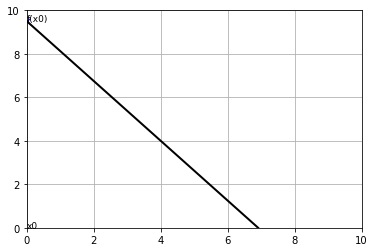

In [10]:
#iteration t = 0
t = 0
x_t.append(0)
print(x_t)
f_x_t.append(compute_f_of_x(x_t[t]))
print(f_x_t)
#Choose x = 2 to find subgradient of iteration 1
s_t.append(compute_subgradient(x=2,x_t= x_t[t]))
print(s_t)
plotSubgradients(t, x_t, f_x_t, s_t)

In [11]:
#At x = 0 is the min m_t(x)
m_t_x.append(0)
print(m_t_x)

[0]


LB 0
UB 9.5
[2.78255]


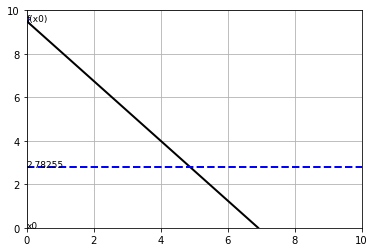

In [12]:
level_t.append(compute_level_t(t-1, m_t_x, lamb, f_x_t))
print(level_t)
plotLevel(t,x_t,f_x_t,s_t,level_t)

## Iteration 1

[0, 4.885418181818181]
[9.5, 6.246095454545454]
[-1.375, 1.125]


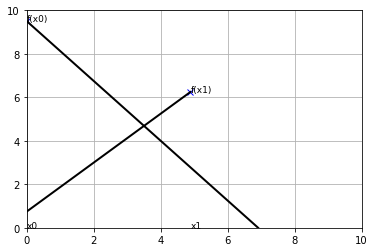

In [13]:
x_t.append(compute_x_t(t, x_t, f_x_t, s_t, level_t))
print(x_t)
t += 1
f_x_t.append(compute_f_of_x(x_t[t]))
print(f_x_t)
#Choose x = 5 to find subgradient of iteration t= 1
s_t.append(compute_subgradient(x=5,x_t= x_t[t]))
print(s_t)
plotSubgradients(t, x_t, f_x_t, s_t)

In [14]:
#Find intersection of two subgradients, that's the min m_t(x)
m_t_x.append(compute_m_t_of_x(t, x_t, f_x_t, s_t))
print(m_t_x)

[0, 4.6875]


LB 4.6875
UB 6.246095454545454
[2.78255, 5.144012608636364]


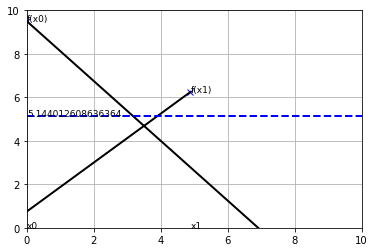

In [15]:
level_t.append(compute_level_t(t, m_t_x, lamb, f_x_t))
print(level_t)
plotLevel(t,x_t,f_x_t,s_t,level_t)

In [0]:
## Iteration 2

[0, 4.885418181818181, 3.9057889854545453]
[9.5, 6.246095454545454, 5.320658260909091]
[-1.375, 1.125, -0.7500000000000008]


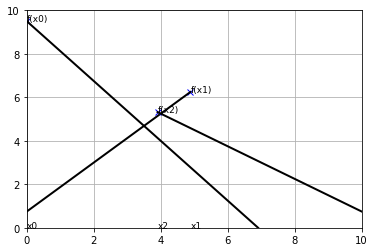

In [17]:
x_t.append(compute_x_t(t, x_t, f_x_t, s_t, level_t))
print(x_t)
t += 1
f_x_t.append(compute_f_of_x(x_t[t]))
print(f_x_t)
#Choose x = 3.5 to find subgradient of iteration t= 1
s_t.append(compute_subgradient(x=3.5,x_t= x_t[t]))
print(s_t)
plotSubgradients(t, x_t, f_x_t, s_t)

In [18]:
m_t_x.append(compute_m_t_of_x(t, x_t, f_x_t, s_t))
print(m_t_x)

[0, 4.6875, 5.25]


LB 5.25
UB 5.320658260909091
[2.78255, 5.144012608636364, 5.2706958046202725]


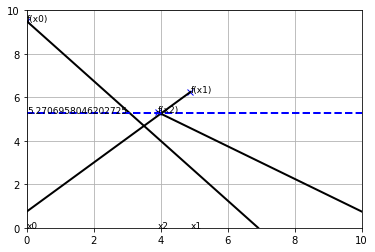

In [19]:
level_t.append(compute_level_t(t, m_t_x, lamb, f_x_t))
print(level_t)
plotLevel(t,x_t,f_x_t,s_t,level_t)

## Iteration 3

[0, 4.885418181818181, 3.9057889854545453, 3.9724055938396363]
[9.5, 6.246095454545454, 5.320658260909091, 5.2706958046202725]
[-1.375, 1.125, -0.7500000000000008, -0.7499999999989486]


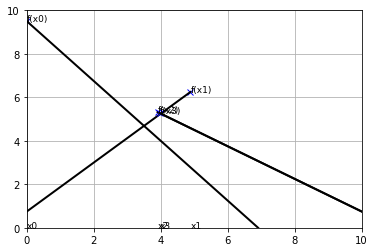

In [20]:
x_t.append(compute_x_t(t, x_t, f_x_t, s_t, level_t))
print(x_t)
t += 1
f_x_t.append(compute_f_of_x(x_t[t]))
print(f_x_t)
#Choose x = 3.9723 to find subgradient of iteration t= 1
s_t.append(compute_subgradient(x=3.9723,x_t= x_t[t]))
print(s_t)
plotSubgradients(t, x_t, f_x_t, s_t)

In [21]:
m_t_x.append(compute_m_t_of_x(t, x_t, f_x_t, s_t))
print(m_t_x)

[0, 4.6875, 5.25, 5.270576131687243]


LB 5.270576131687243
UB 5.2706958046202725
[2.78255, 5.144012608636364, 5.2706958046202725, 5.2706111838893275]


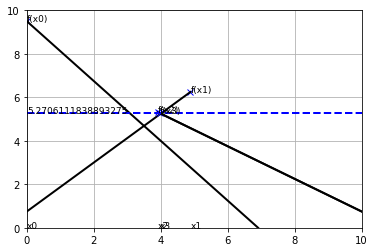

In [22]:
level_t.append(compute_level_t(t, m_t_x, lamb, f_x_t))
print(level_t)
plotLevel(t,x_t,f_x_t,s_t,level_t)

## Iteration 4
x* = 3.97

f(x*) = 5.27

In [23]:
x_t.append(compute_x_t(t, x_t, f_x_t, s_t, level_t))
print(x_t)

[0, 4.885418181818181, 3.9057889854545453, 3.9724055938396363, 3.9725184214808964]
